# <center>Customer Service Requests Analysis</center>

By Kumar Anurag

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the CSV data

In [12]:
# Define data types for specific columns
dtypes = {
    'Unique Key': 'int64',
    'Incident Zip': 'float64',
    'X Coordinate (State Plane)': 'float64',
    'Y Coordinate (State Plane)': 'float64',
    'School or Citywide Complaint': 'float64',
    'Vehicle Type': 'float64',
    'Taxi Company Borough': 'float64',
    'Taxi Pick Up Location': 'float64',
    'Garage Lot Name': 'float64',
    'Latitude': 'float64',
    'Longitude': 'float64'
}

# Load the CSV data into a DataFrame with specified data types and low_memory set to False
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", dtype=dtypes, low_memory=False)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## Data Exploration and Preprocessing

In [13]:
# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

## Data Analysis and Visualization

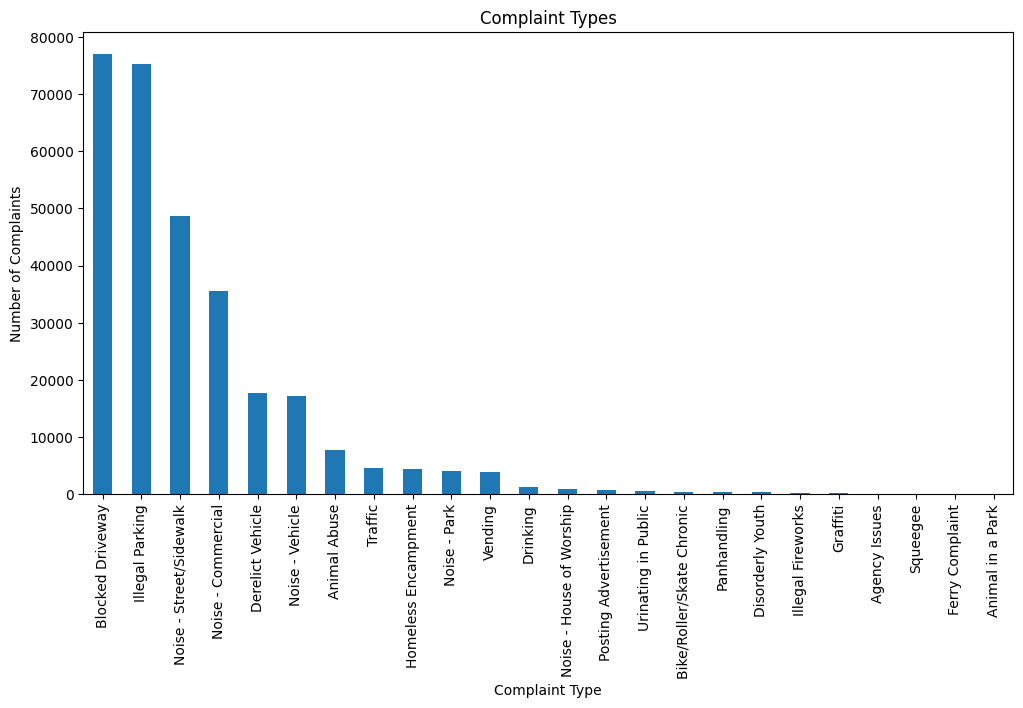

In [14]:
# Example: Visualize complaint types
complaint_counts = df['Complaint Type'].value_counts()
complaint_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")
plt.show()

## Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [20]:
# Define data types for specific columns
dtypes = {
    'Unique Key': 'int64',
    'Incident Zip': 'float64',
    'X Coordinate (State Plane)': 'float64',
    'Y Coordinate (State Plane)': 'float64',
    'School or Citywide Complaint': 'float64',
    'Vehicle Type': 'float64',
    'Taxi Company Borough': 'float64',
    'Taxi Pick Up Location': 'float64',
    'Garage Lot Name': 'float64',
    'Latitude': 'float64',
    'Longitude': 'float64'
}

# Load the CSV data into a DataFrame with specified data types and low_memory set to False
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", dtype=dtypes, low_memory=False)

# Convert 'Created Date' to datetime data type with multiple formats
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Created Date'].combine_first(pd.to_datetime(df['Created Date'], format='%m-%d-%y %H:%M', errors='coerce'))

# Do the same for 'Closed Date' if needed
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Closed Date'].combine_first(pd.to_datetime(df['Closed Date'], format='%m-%d-%y %H:%M', errors='coerce'))



# Calculate the time elapsed between request creation and request closing
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

# Display the first few rows of the DataFrame with the new 'Request_Closing_Time' column
print(df[['Created Date', 'Closed Date', 'Request_Closing_Time']].head())

         Created Date Closed Date Request_Closing_Time
0 2015-12-31 23:59:45         NaT                  NaT
1 2015-12-31 23:59:44         NaT                  NaT
2 2015-12-31 23:59:29         NaT                  NaT
3 2015-12-31 23:57:46         NaT                  NaT
4 2015-12-31 23:56:58         NaT                  NaT


## Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

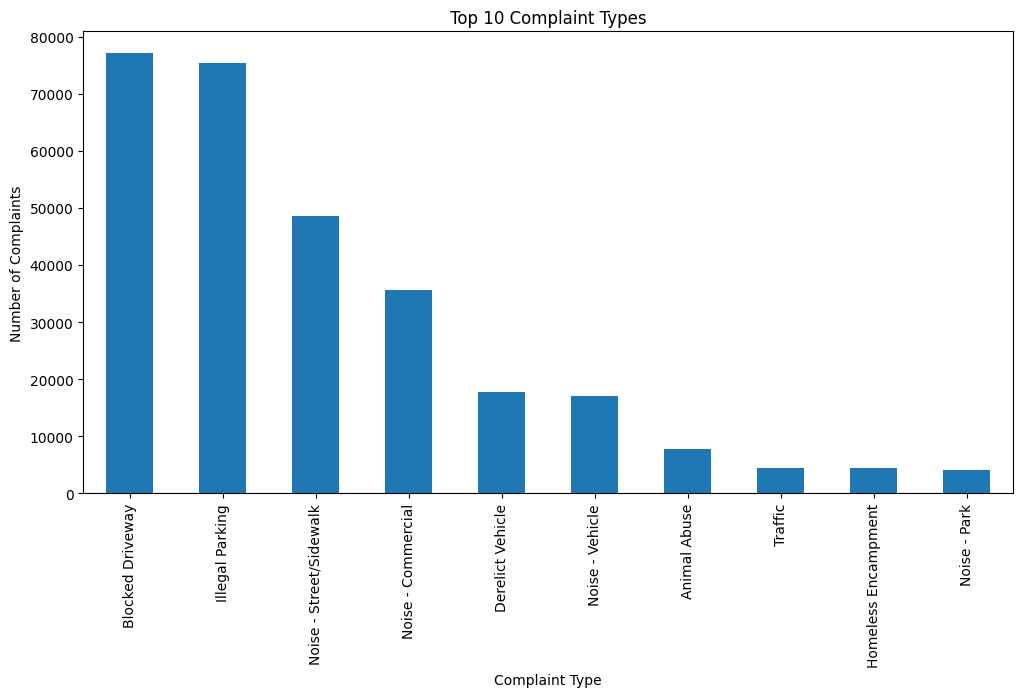

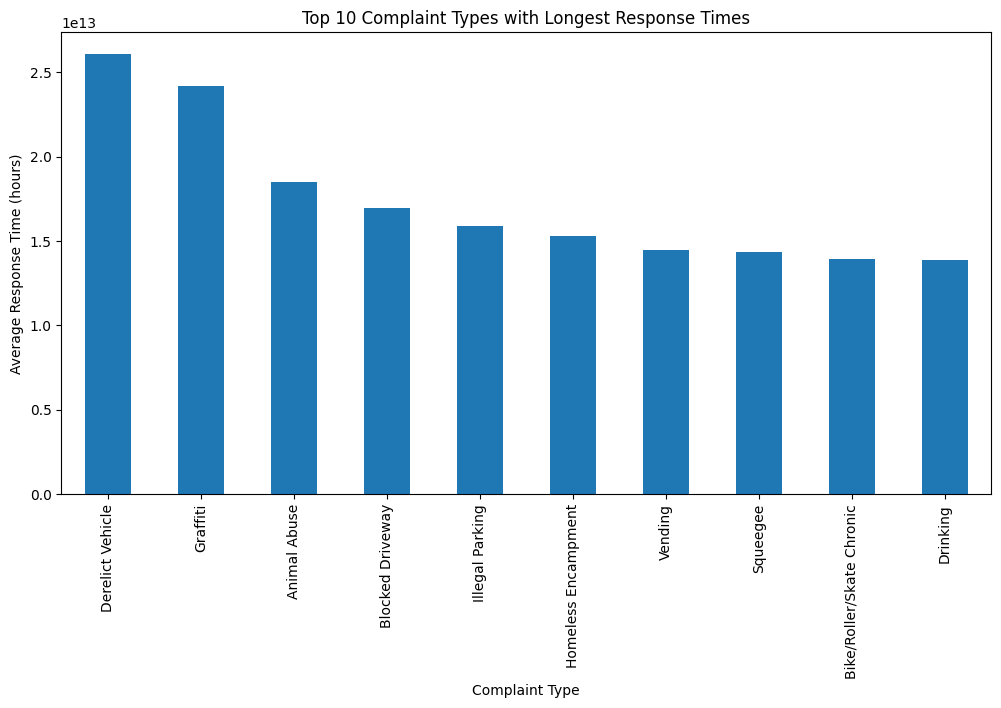

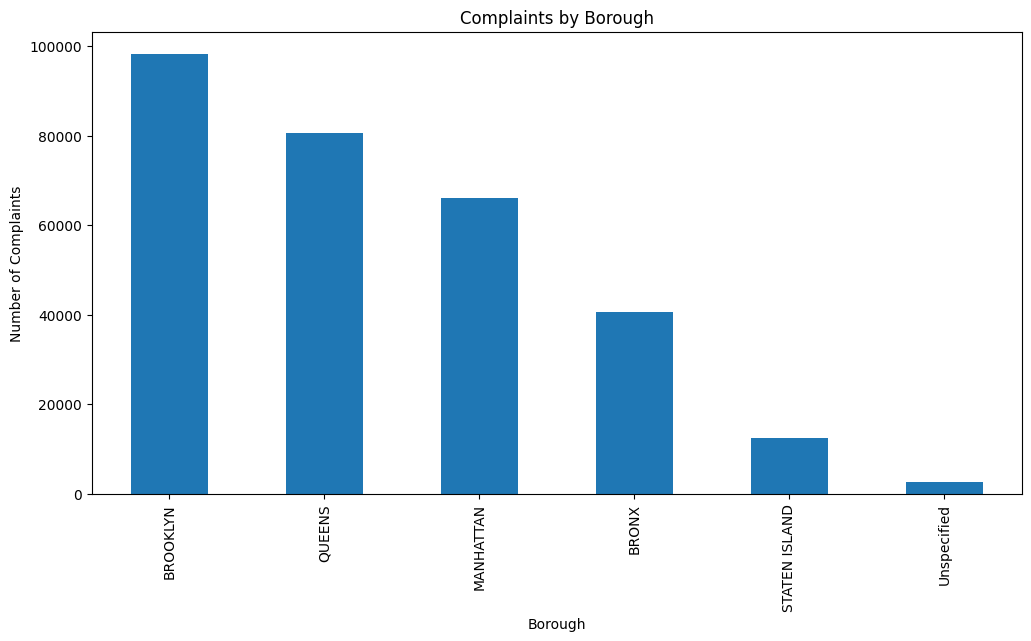

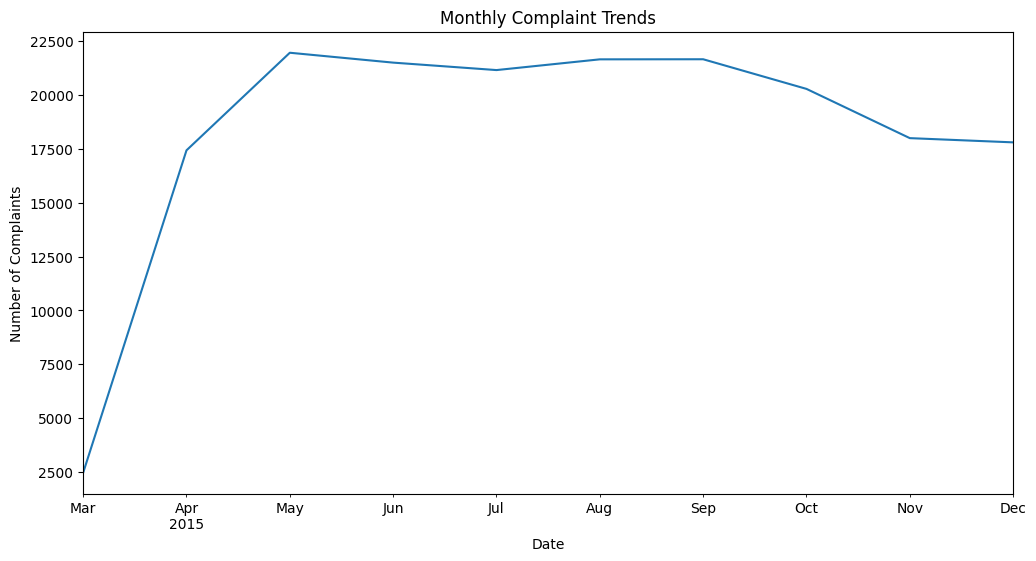

In [21]:
import matplotlib.pyplot as plt

# 1. Distribution of Complaint Types
complaint_counts = df['Complaint Type'].value_counts()
plt.figure(figsize=(12, 6))
complaint_counts.head(10).plot(kind='bar')
plt.title("Top 10 Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")

# 2. Response Time Analysis
avg_response_time = df.groupby('Complaint Type')['Request_Closing_Time'].mean()
avg_response_time.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
avg_response_time.head(10).plot(kind='bar')
plt.title("Top 10 Complaint Types with Longest Response Times")
plt.xlabel("Complaint Type")
plt.ylabel("Average Response Time (hours)")

# 3. Borough-wise Complaint Analysis
borough_counts = df['Borough'].value_counts()
plt.figure(figsize=(12, 6))
borough_counts.plot(kind='bar')
plt.title("Complaints by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")

# 4. Temporal Trends
df['Created Date'] = pd.to_datetime(df['Created Date'])
complaints_by_month = df.resample('M', on='Created Date').size()
plt.figure(figsize=(12, 6))
complaints_by_month.plot()
plt.title("Monthly Complaint Trends")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")

plt.show()

## Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [22]:
# Group the data by 'Borough' and 'Complaint Type' and calculate the average 'Request_Closing_Time' for each group
complaints_grouped = df.groupby(['Borough', 'Complaint Type'])['Request_Closing_Time'].mean()

# Reset the index to make it easier to work with
complaints_grouped = complaints_grouped.reset_index()

# Sort the data by the average 'Request_Closing_Time' in ascending order
complaints_grouped = complaints_grouped.sort_values(by='Request_Closing_Time')

# Display the result
print(complaints_grouped)

           Borough             Complaint Type      Request_Closing_Time
97   STATEN ISLAND      Posting Advertisement 0 days 01:12:57.407665505
104    Unspecified  Bike/Roller/Skate Chronic           0 days 01:39:12
69          QUEENS          Illegal Fireworks 0 days 01:49:54.363636363
48       MANHATTAN          Illegal Fireworks 0 days 01:57:03.866666666
89   STATEN ISLAND          Illegal Fireworks    0 days 02:14:16.500000
..             ...                        ...                       ...
108    Unspecified            Ferry Complaint                       NaT
111    Unspecified   Noise - House of Worship                       NaT
115    Unspecified                Panhandling                       NaT
116    Unspecified      Posting Advertisement                       NaT
117    Unspecified                    Traffic                       NaT

[119 rows x 3 columns]


## Whether the average response time across complaint types is similar or not (overall)

In [24]:
import scipy.stats as stats

# Filter out complaint types with no data for 'Request_Closing_Time'
data = [df[df['Complaint Type'] == complaint]['Request_Closing_Time'].dropna() for complaint in df['Complaint Type'].unique() if not df[df['Complaint Type'] == complaint]['Request_Closing_Time'].dropna().empty]

# Perform the ANOVA test if there are complaint types with data
if len(data) > 1:
    f_statistic, p_value = stats.f_oneway(*data)

    # Set the significance level (alpha)
    alpha = 0.05

    # Check the p-value against the significance level to determine whether to accept or reject the null hypothesis
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in average response time across complaint types.")
    else:
        print("Accept the null hypothesis. The average response time is similar across complaint types.")

    # Display the p-value
    print("p-value:", p_value)
else:
    print("Insufficient data for ANOVA. Unable to perform the test.")


Reject the null hypothesis. There is a significant difference in average response time across complaint types.
p-value: 0.0


## Are the type of complaint or service requested and location related?

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a cross-tabulation (contingency table) of 'Complaint Type' and 'Borough'
contingency_table = pd.crosstab(df['Complaint Type'], df['Borough'])

# Perform the Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level to determine whether to accept or reject the null hypothesis
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between complaint type and location.")
else:
    print("Accept the null hypothesis. Complaint type and location are independent.")

# Display the p-value
print("p-value:", p)

Reject the null hypothesis. There is a significant relationship between complaint type and location.
p-value: 0.0
